# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_data_complete = pd.merge(study_results, mouse_metadata, how="outer", on=["Mouse ID"])

# Display the data table for preview
mouse_data_complete.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [2]:
# Checking the number of mice.
mice_number = len(mouse_data_complete["Mouse ID"].unique())
mice_number

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mouse_data_complete["Mouse ID"].value_counts()

Mouse ID
g989    13
b128    10
q787    10
s337    10
q511    10
        ..
f932     1
b447     1
u153     1
t573     1
o848     1
Name: count, Length: 249, dtype: int64

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
mouse989 = mouse_data_complete.set_index("Mouse ID")
mouse989.loc["g989"]

,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
Mouse ID,,,,,,,
g989,0,45.000000,0,Propriva,Female,21,26
g989,0,45.000000,0,Propriva,Female,21,26
g989,5,48.786801,0,Propriva,Female,21,26
g989,5,47.570392,0,Propriva,Female,21,26
g989,10,51.745156,0,Propriva,Female,21,26
g989,10,49.880528,0,Propriva,Female,21,26
g989,15,51.325852,1,Propriva,Female,21,26
g989,15,53.442020,0,Propriva,Female,21,26
g989,20,55.326122,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mouse_data = mouse989.drop(["g989"])
clean_mouse_data.head()

,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
Mouse ID,,,,,,,
b128,0,45.000000,0,Capomulin,Female,9,22
b128,5,45.651331,0,Capomulin,Female,9,22
b128,10,43.270852,0,Capomulin,Female,9,22
b128,15,43.784893,0,Capomulin,Female,9,22
b128,20,42.731552,0,Capomulin,Female,9,22


In [6]:
# Checking the number of mice in the clean DataFrame.
clean_mouse_data = clean_mouse_data.reset_index()
mice = len(clean_mouse_data["Mouse ID"].unique())
mice

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
tumor_data = clean_mouse_data.groupby(['Drug Regimen'])
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
tumor_mean = tumor_data['Tumor Volume (mm3)'].mean()
tumour_median = tumor_data['Tumor Volume (mm3)'].median()
tumor_variance = tumor_data['Tumor Volume (mm3)'].var()
tumor_stddev = tumor_data['Tumor Volume (mm3)'].std()
tumor_sem = tumor_data['Tumor Volume (mm3)'].sem()
# Assemble the resulting series into a single summary DataFrame.
tumor_df = pd.DataFrame({"Mean": tumor_mean,
                         "Median": tumour_median,
                         "Variance": tumor_variance,
                         "Standard Deviation": tumor_stddev,
                         "SEM": tumor_sem})
tumor_df

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
tumor_again = clean_mouse_data.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])
tumor_again

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

Text(0, 0.5, 'Number of Observed Mouse Timepoints')

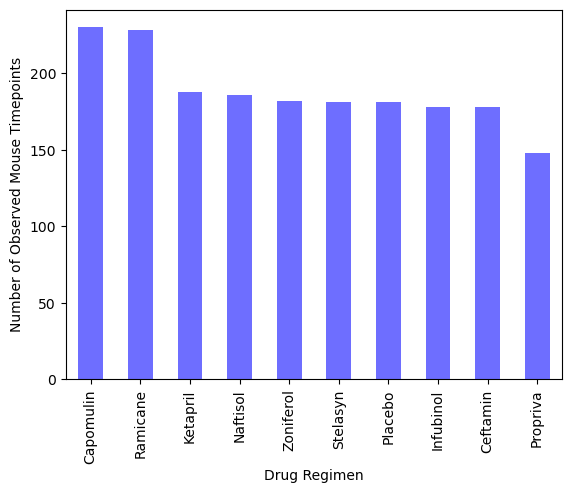

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
panda_barchart = clean_mouse_data['Drug Regimen'].value_counts().plot.bar(facecolor='blue',alpha=.57,align='center')
panda_barchart.set_xlabel("Drug Regimen")
panda_barchart.set_ylabel("Number of Observed Mouse Timepoints")

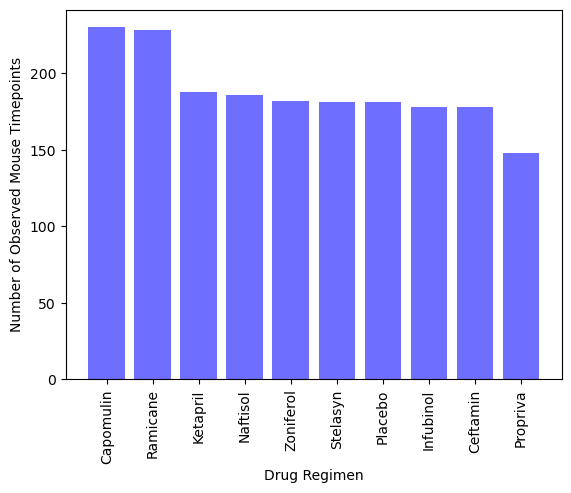

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

drug_counts = clean_mouse_data['Drug Regimen'].value_counts()
x_axis = np.arange(len(drug_counts))
plt.bar(x_axis, drug_counts, color='blue', alpha=.57)
tick_location = [value for value in x_axis]
plt.xticks(tick_location, drug_counts.index.values)
plt.xticks(rotation=90)
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Observed Mouse Timepoints")
plt.show()

Text(0, 0.5, 'Sex')

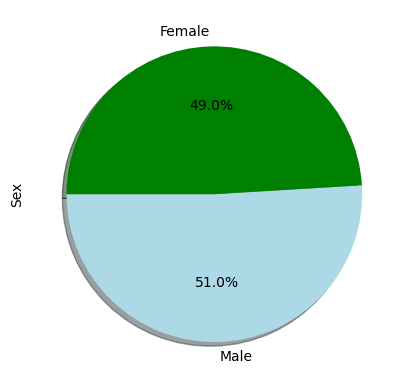

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex_data = clean_mouse_data['Sex'].value_counts()
pandas_pie = sex_data.plot.pie(autopct = "%1.1f%%", startangle=180, colors=["lightblue", "green"], shadow=True )
pandas_pie.set_ylabel("Sex")

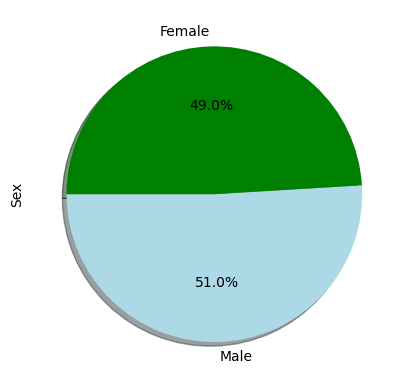

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(sex_data, labels=sex_data.index.values, autopct="%1.1f%%", startangle=180, colors=["lightblue", "green"],shadow=True)
plt.ylabel("Sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_timepoint = pd.DataFrame(clean_mouse_data.groupby('Mouse ID').max()['Timepoint'])

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merge_df = pd.merge(clean_mouse_data, max_timepoint, on=('Mouse ID'), how='left')
#merge_df = merge_df.drop(columns=['index'])
merge_df = merge_df.rename(columns={'Timepoint_x':'Timepoint', 'Timepoint_y': 'Max_Timepoint'})
merge_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g),Max_Timepoint
0,b128,0,45.000000,0,Capomulin,Female,9,22,45
1,b128,5,45.651331,0,Capomulin,Female,9,22,45
2,b128,10,43.270852,0,Capomulin,Female,9,22,45
3,b128,15,43.784893,0,Capomulin,Female,9,22,45
4,b128,20,42.731552,0,Capomulin,Female,9,22,45
...,...,...,...,...,...,...,...,...,...
1875,m601,25,33.118756,1,Capomulin,Male,22,17,45
1876,m601,30,31.758275,1,Capomulin,Male,22,17,45
1877,m601,35,30.834357,1,Capomulin,Male,22,17,45
1878,m601,40,31.378045,1,Capomulin,Male,22,17,45


In [31]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
treatment_values = []
outliars = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in treatments:
    treatment_df = merge_df.loc[merge_df['Drug Regimen'] == treatment]
    final_volume = treatment_df.loc[treatment_df['Timepoint'] == treatment_df['Max_Timepoint']]
    values = final_volume['Tumor Volume (mm3)']
    treatment_values.append(values)

    quartiles = values.quantile([.25,.5,.75])
    lower_quartile = quartiles[.25]
    upper_quartile = quartiles[.75]
    iqr = upper_quartile - lower_quartile
    #print(f'IQR for {treatment} is {iqr}')
    # Locate the rows which contain mice on each drug and get the tumor volumes
    lower_bound = lower_quartile - (1.5 * iqr)
    upper_bound = upper_quartile + (1.5 * iqr)
    print(f'For {treatment} values below {lower_bound} or above {upper_bound} could be outliars')
    
    # add subset 

    
    # Determine outliers using upper and lower bounds
    ourliars = (values.loc[(final_volume['Tumor Volume (mm3)'] > upper_bound) | (final_volume['Tumor Volume (mm3)'] < lower_bound)])
    print(f'{treatment} outliars: {outliars}')


For Capomulin values below 20.70456164999999 or above 51.83201549 could be outliars
Capomulin outliars: []
For Ramicane values below 17.912664470000003 or above 54.30681135 could be outliars
Ramicane outliars: []
For Infubinol values below 36.83290494999999 or above 82.74144559000001 could be outliars
Infubinol outliars: []
For Ceftamin values below 25.355449580000002 or above 87.66645829999999 could be outliars
Ceftamin outliars: []


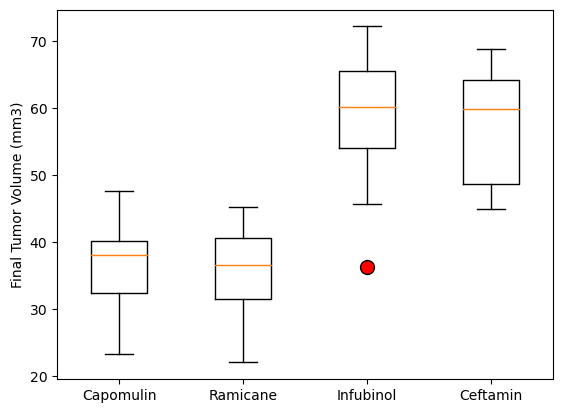

In [33]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
show_outliars = dict(marker='o', markerfacecolor='red', markersize = 10, markeredgecolor='black')

plt.boxplot(treatment_values, flierprops=show_outliars)
plt.ylabel("Final Tumor Volume (mm3)")
plt.xticks([1,2,3,4], ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])
plt.show()

## Line and Scatter Plots

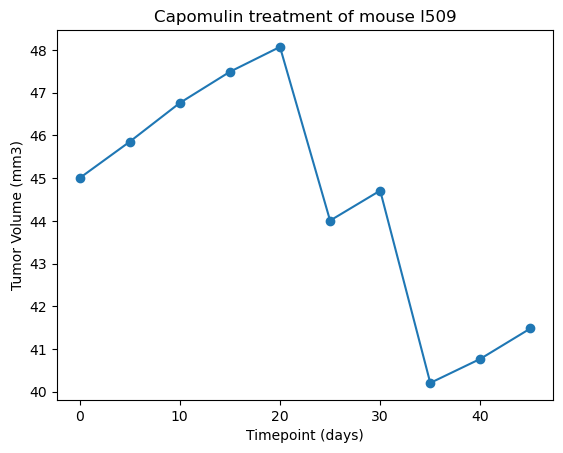

In [41]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
mouse = mouse_data_complete.loc[mouse_data_complete['Mouse ID'] == 'l509']

plt.plot(mouse['Timepoint'], mouse['Tumor Volume (mm3)'], marker = 'o')
plt.title("Capomulin treatment of mouse l509")
plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Timepoint (days)")
plt.show()

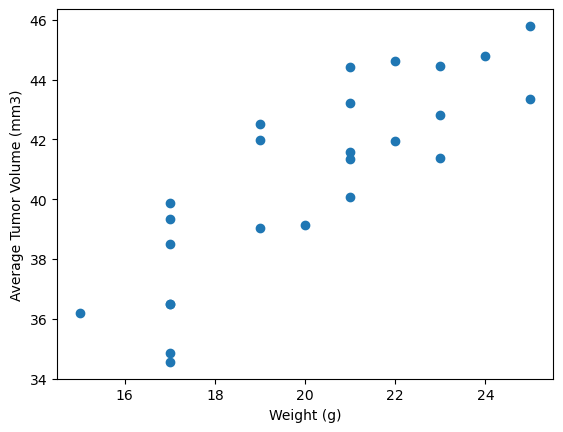

In [46]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_data = mouse_data_complete.loc[mouse_data_complete['Drug Regimen'] == 'Capomulin']

avg_tumor_volume = pd.DataFrame(capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean().reset_index().rename(columns={'Tumor Volume (mm3)' : 'Average Tumor Volume'}))
#merging tumor volume onto Capomulin data
avg_tumor_volume = pd.merge(capomulin_data, avg_tumor_volume, on='Mouse ID')
final_avg_tumor_volume = avg_tumor_volume[['Weight (g)', 'Average Tumor Volume']].drop_duplicates()
x_data = final_avg_tumor_volume['Weight (g)']
y_data = final_avg_tumor_volume['Average Tumor Volume']

plt.scatter(x_data, y_data)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


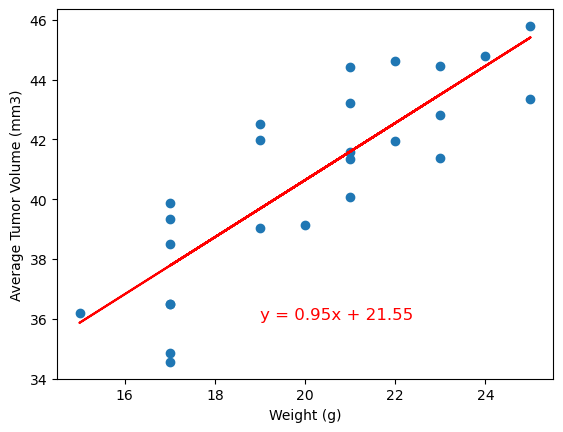

In [63]:
# Calculate the correlation coefficient and a linear regression model 
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_data, y_data)
regress_values = x_data * slope + intercept
correlation = st.pearsonr(x_data,y_data)
line_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
plt.scatter(x_data, y_data)
plt.plot(x_data, regress_values, 'r-')
plt.annotate(line_equation, (19 , 36), fontsize=12, color = "red")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
print(f'The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}')
